In [1]:
%%html
<!-- Center align for images -->
<style>
.output {
    text-align: center;
    vertical-align: middle;
}
</style>



# Import Packages

In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Read Data

In [4]:
# Get DSCI521-project/data directory
current_dir = os.getcwd()
parent = os.path.dirname(current_dir)

# Read csv file 
dataset = pd.read_csv(parent+"/data/heart_disease_uci.csv", sep = ",", header = 0)

# Ensure dataset was loaded
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Missing Values

In [27]:
missing_ls = []
# Iterate over columns in dataset
for column in dataset.columns:
    
    # Ensure there are missing values
    if not dataset[dataset[column] == -9].empty:
        
        # Append column to the list
        missing_ls.append(column)

# Print list with columns that have missing values 
print("Columns with missing values: ", missing_ls)



Columns with missing values:  ['ca', 'thal']


In [28]:
dataset[dataset["ca"] == -9]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,-9,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,-9,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,-9,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,-9,3,0


In [29]:
dataset[dataset["thal"] == -9]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,-9,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,-9,2


# Demographic Data Exhibition

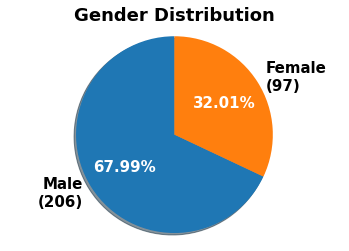

In [5]:
# Gender 
# 1 - male, 0 - female
total_count = len(dataset)
male_count = dataset[dataset["sex"] == 1].shape[0]
female_count = total_count - male_count

# Labels
percent = [male_count/total_count, female_count/total_count]
labels = [f"Male\n("+str(male_count)+")", f"Female\n("+str(female_count)+")"]

# Figure
fig1, ax1 = plt.subplots()

# Pie Chart
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

# Title
ax1.set_title("Gender Distribution", fontsize = 18, fontweight = "bold")

# Change text color, wieght and size
for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Age Distribution

In [6]:
# Age 

min_age, max_age = dataset["age"][dataset["age"].idxmin].item(), dataset["age"][dataset["age"].idxmax].item()

print("Maximum age: "+ str(max_age))
print("Minimum age: "+ str(min_age))

Maximum age: 77
Minimum age: 29


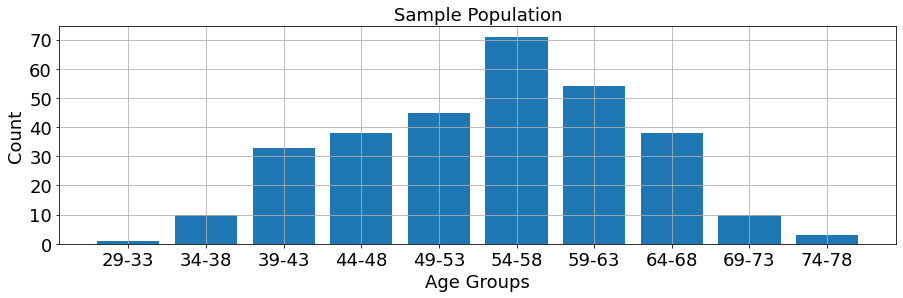

In [7]:
# Counter and empty list
age_dict = Counter()
labels = []
age_groups_dict = Counter()
age_ls = dataset["age"].tolist()

# Count age
for age in age_ls:
    age_dict[age] += 1

# Sorted age and get keys
sorted_age_dict = dict(sorted(age_dict.items(), key = lambda x: x[0]))
keys = set(sorted_age_dict.keys())

# Iterate over age with steps of 5
for i, age in enumerate(range(min_age, max_age, 5)):
    
    # Append label for that age group
    labels.append(str(age)+"-"+str(age+4))
    
    # Iterate over ages in that age group
    for index in range(age,age+5,1):
        
        # Ensure there are patients in that age
        if index in keys:
            
            # Sum number of people in that age group
            age_groups_dict[i] += sorted_age_dict[index]

# Convert dictionary to list in order to show in a graph
count = [value for value in age_groups_dict.values()]

# Figure - Bar 
plt.figure(figsize=(15,4))
plt.bar(labels,count)
plt.title('Sample Population', fontsize=18)
plt.xlabel('Age Groups', fontsize=18)
plt.xticks(fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

# Medical History

In [8]:
# Heart Disease Distribution
healthy = dataset[dataset["target"] == 0].shape[0]
sick = dataset[dataset["target"] > 0].shape[0]

# Age distribution among healthy patients
healthy_men = dataset[(dataset["target"] == 0) & (dataset["sex"] == 1)].shape[0]
healthy_women = healthy - healthy_men

# Age distribution among sick patients
sick_men = dataset[(dataset["target"] > 0) & (dataset["sex"] == 1)].shape[0]
sick_women = sick - sick_men

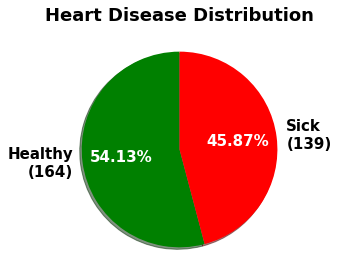

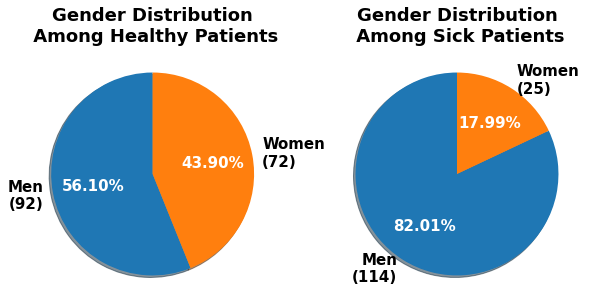

NOTE: Numbers in parenthesis are the amount of people in that category. 
For example, Healthy(164) means that there are 164 healthy patients out of 303 patients in total


In [9]:
# Upper Pie Chart
total_count = len(dataset)
percent = [healthy/total_count, sick/total_count]
labels = [f"Healthy\n("+str(healthy)+")", f"Sick\n("+str(sick)+")"]
fig1, ax1 = plt.subplots(figsize=(4.5,4.5))
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90, colors=["Green", "Red"])

ax1.set_title("Heart Disease Distribution", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
plt.show()


# Lower Pie Charts

# Pie chart 1
labels = [f"Men\n("+str(healthy_men)+")", f"Women\n("+str(healthy_women)+")"]
percent = [healthy_men/healthy , healthy_women/healthy]
percent2 = [sick_men/sick, sick_women/sick]

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
patches, texts, autotexts  = ax1.pie(percent, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
ax1.set_title("Gender Distribution\n Among Healthy Patients", fontsize = 18, fontweight = "bold")

# Pie chart 2
labels = [f"Men\n("+str(sick_men)+")", f"Women\n("+str(sick_women)+")"]    
patches, texts, autotexts  = ax2.pie(percent2, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

ax2.set_title("Gender Distribution\n Among Sick Patients", fontsize = 18, fontweight = "bold")

for autotext,text in zip(autotexts,texts):
    autotext.set_color("w")
    autotext.set_size(15)
    autotext.set_weight("bold")
    text.set_size(15)
    text.set_weight("bold")
    
plt.show()

print("NOTE: Numbers in parenthesis are the amount of people in that category.",
      "\nFor example, Healthy(164) means that there are 164 healthy patients out of 303 patients in total")